In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
#sklearn! https://scikit-learn.org/stable/
from sklearn import linear_model

# EPA AQS Data

In [2]:
filename = "LA_AQS_2023.csv"
df = pd.read_csv(filename)
df.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
0,6,37,1103,68103,1,34.06659,-118.22688,WGS84,Ambient Min Temperature,24 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
2,6,37,1103,62201,1,34.06659,-118.22688,WGS84,Relative Humidity,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
3,6,37,1103,62101,1,34.06659,-118.22688,WGS84,Outdoor Temperature,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
4,6,37,1103,42603,1,34.06659,-118.22688,WGS84,Oxides of nitrogen (NOx),1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [3]:
df_O3 = df[(df["Parameter Name"]=="Ozone") & (df['Duration Description']=="1 HOUR")]
#dataframe for O3

In [4]:
# Let's make sure 'date' is actually a date in pandas
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])


/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_8595/4147484031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])


In [5]:
df_NO2 = df[(df["Parameter Name"]=="Nitrogen dioxide (NO2)") & (df['Duration Description']=="1 HOUR")]
#dataframe for NO2

In [6]:
# Let's make sure 'date' is actually a date in pandas
df_NO2["Date (Local)"] = pd.to_datetime(df_NO2["Date (Local)"])


/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_8595/169335320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NO2["Date (Local)"] = pd.to_datetime(df_NO2["Date (Local)"])


In [7]:
df_1 = pd.DataFrame(data = {"NO2" : df_NO2["Arithmetic Mean"], 'Date' : df_NO2['Date (Local)']})
df_2 = pd.DataFrame(data = {"O3" : df_O3["Arithmetic Mean"], 'Date' : df_O3['Date (Local)']})
df_all = df_1.merge(df_2, on=['Date'])

In [8]:
df_all

,NO2,Date,O3
0,4.816667,2023-01-01,0.031708
1,4.550000,2023-01-01,0.031708
2,4.550000,2023-01-01,0.031708
3,4.816667,2023-01-01,0.031708
4,14.720833,2023-01-02,0.015792
...,...,...,...
1087,8.614286,2023-09-29,0.039048
1088,6.370833,2023-09-30,0.030042
1089,6.370833,2023-09-30,0.030042
1090,7.362500,2023-09-30,0.030042


In [9]:
# Put the series into a dataframe
df = pd.DataFrame({'x':df_all["NO2"], 'y':df_all["O3"]})

<Axes: xlabel='x', ylabel='y'>

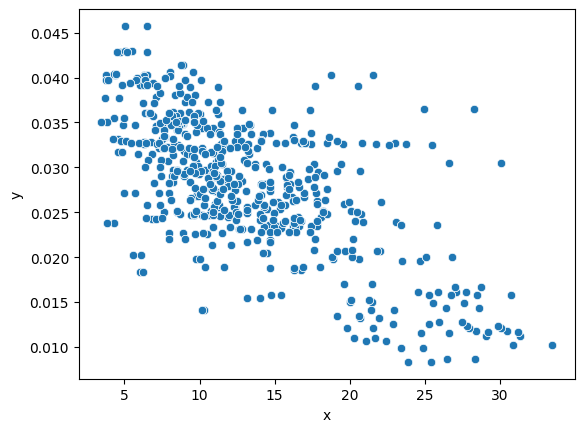

In [10]:
# Make a scatterplot
sns.scatterplot(data=df, x="x", y="y")

In [11]:
# The method takes arrays as input. The input should be 2D, the output: 1D!
print('Type of df: ', type(df))
print('Type of x: ', type(df_all["NO2"]))
print('Type of df: ', type(df['x']))

Type of df:  <class 'pandas.core.frame.DataFrame'>
Type of x:  <class 'pandas.core.series.Series'>
Type of df:  <class 'pandas.core.series.Series'>


In [12]:
# Make them arrays by uisng np.array
xVal = np.array(df['x']).reshape((-1, 1))
yVal = np.array(df['y'])

reg = linear_model.LinearRegression()
reg.fit(xVal,yVal)

LinearRegression()

In [13]:
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [-0.00080499]
Intercept: 
 0.038645721163206206


# 1. Fit a line between O3 and NO2

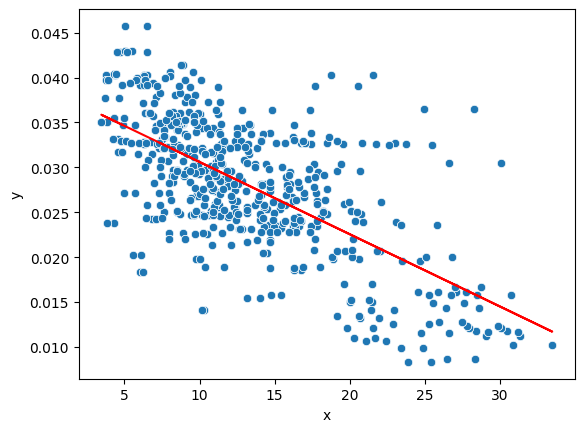

In [14]:
yPred = reg.predict(xVal)
df['yPred'] = yPred
sns.scatterplot(data=df, x="x", y="y")
plt.plot(df['x'], df['yPred'], color='r')

In [15]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(df['y'],df['yPred'])

3.197692798303184e-05

# 2. What is your test error?

#### Mean squared error is 3.197692798303184e-05 ppm^2

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xVal, yVal, test_size=0.20)

In [18]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
print("Coefficients: \n", reg2.coef_)
print("Intercept: \n", reg2.intercept_)

Coefficients: 
 [-0.00078209]
Intercept: 
 0.03834008446071418


In [19]:
#Plot Test Data
df_test = pd.DataFrame({'x' : X_test.ravel(), 'y' : y_test.ravel()})
df_test['yPred'] = reg2.predict(X_test)

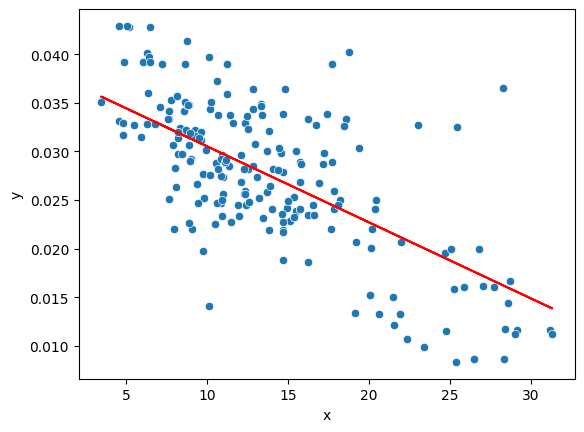

In [20]:
sns.scatterplot(data=df_test, x="x", y="y")
plt.plot(df_test['x'], df_test['yPred'], color='r')

In [21]:
mean_squared_error(df_test['y'],df_test['yPred'])

3.033319735559433e-05

# 3. Do you think a linear model performs well? Why/whynot?

 The linear model is performing well considering the root mean square error value of the fitted line for the test dataset is very close to the rmse value of the whole dataset. Additionally the value is very small and the line visually seems to fit the scattered nature of the dataset well.

# Mauna Loa CO2

In [22]:
filename = "38090658.csv"
df2 = pd.read_csv(filename)
df2.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [23]:
#dataframe for train data before year 2000
df_co2_train = df2[(df2["decimal date"] < 2000)]

In [24]:
# Put the series into a dataframe
df_co2_train = pd.DataFrame({'x_train':df_co2_train["decimal date"], 'y_train':df_co2_train["deseasonalized"]})

In [25]:
#dataframe for test data after year 2000
df_co2_test = df2[(df2["decimal date"] >= 2000)]

In [26]:
# Put the series into a dataframe
df_co2_test = pd.DataFrame({'x_test':df_co2_test["decimal date"], 'y_test':df_co2_test["deseasonalized"]})

In [27]:
#reshaping the xvalues
xVal_train = np.array(df_co2_train['x_train']).reshape((-1, 1))
yVal_train = np.array(df_co2_train['y_train'])

In [28]:
reg2 = linear_model.LinearRegression()
reg2.fit(xVal_train,yVal_train)
print("Coefficients: \n", reg2.coef_)
print("Intercept: \n", reg2.intercept_)


Coefficients: 
 [1.3258599]
Intercept: 
 -2285.678821206615


# 1. Fit a linear model of CO2 vs. time (decimal date) using data before 2000.

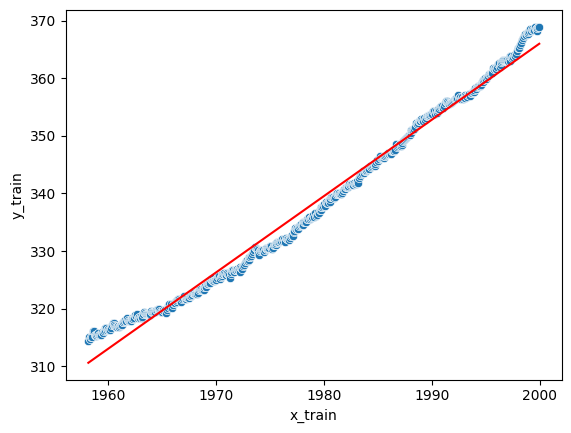

In [29]:
yPred = reg2.predict(xVal_train)
df_co2_train.loc[:,('yPred')] = yPred
sns.scatterplot(data=df_co2_train, x=df_co2_train[('x_train')], y=df_co2_train['y_train'])
plt.plot(df_co2_train['x_train'], df_co2_train['yPred'], color='r')


In [30]:
mean_squared_error(df_co2_train['y_train'],df_co2_train['yPred'])

3.2556584432448017

In [31]:
xVal_test = np.array(df_co2_test['x_test']).reshape((-1, 1))
yVal_test = np.array(df_co2_test['y_test'])

In [32]:
#Plot Test Data
df_test = pd.DataFrame({'x' : xVal_test.ravel(), 'y' : yVal_test.ravel()})
df_test['yPred'] = reg2.predict(xVal_test)

# 2. Test your linear model on data after 2000. How well does it perform?

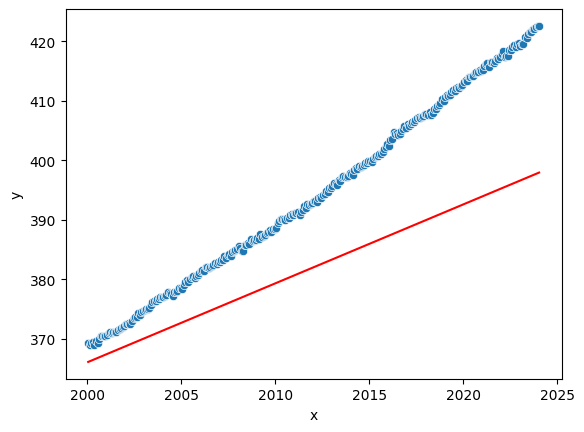

In [33]:
sns.scatterplot(data=df_test, x="x", y="y")
plt.plot(df_test['x'], df_test['yPred'], color='r')

In [34]:
mean_squared_error(df_test['y'],df_test['yPred'])

193.91633637913262

Linear model for data after 2000 does not fit well. For the years before 2000 the linear model did fit well as the rmse was not that big. But with linear model fitting after year 2000, the rmse has increased a lot suggesting that it linear model is not performing well for that part of the dataset.

# 3. Do you think a linear model performs well? Why/whynot?

Linear model is not performing well. The data for CO2 concentration after year 2000 has increased exponentially which cannot be fitted by the linear model. Some other modelling  maybe polynomial regression could do better job.